# Simulating dendrites

## Exercise 1b: How inputs inputs interact on different branches.

In this exercise we will see how inputs integrate when they are located in different dendritic branches.

In [1]:
#@markdown # Install NEURON Simulator
!pip install neuron --quiet  # install neuron simulator

     |████████████████████████████████| 8.7MB 3.8MB/s 


In [2]:
#@markdown ## Make nice plots!
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "font.size": 18,
    })

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.major.size'] = 7

In [3]:
from neuron import h, gui

# Simulation parameters	
h.tstop = 100        # ms
h.dt = 0.1           # ms
h.steps_per_ms = 10  # For plotting-should be compartible with dt, ms
h.v_init = -65       # initial membrane potential, mV

### Create a soma and four dendrites, define their anatomical and biophysical properties and connect them.

In [4]:
# create five compartments using the command h.Section()
soma = h.Section(name='soma')
dend0, dend1, dend2, dend3 = [h.Section(name=n) for n in ['dend0',
                                                          'dend1',
                                                          'dend2',
                                                          'dend3']
                              ]

# Define properties of soma
soma.diam = 20  # um (micro-meter)
soma.L = 200    # um
soma.Ra = 100   # Axial resistance in Ohm * cm
soma.cm = 1     # specific membrane capacitance, uF/cm^2
soma.nseg = 1   # number of segments (spatial grid)

# Insert Hodgkin-Huxley channels (including leak)
soma.insert('hh')
for seg in soma: 
  seg.hh.gnabar = 0.05  # Sodium conductance, S/cm^2
  seg.hh.gkbar = 0.036  # Potassium conductance, S/cm^2
  seg.hh.gl = 0.0003    # Leak conductance, S/cm^2
  seg.hh.el = -65       # Reversal potential, mV

# Define properties of dend0
dend0.diam = 5   # um
dend0.L = 500    # um
dend0.nseg = 11  # number of segments
dend0.cm = 1     # uF/cm^2
dend0.Ra = 100   # Ohm * cm

# Insert passive (leak) channels in dend0
dend0.insert('pas')
for seg in dend0:
  seg.pas.e = -65     # mV
  seg.pas.g = 0.0003  # S/cm^2

# Define properties of dend1
dend1.diam = 3   # um
dend1.L = 200    # um
dend1.nseg = 13  # number of segments
dend1.cm = 1     # uF/cm^2
dend1.Ra = 100   # Ohm * cm

# Insert passive (leak) channels in dend1
dend1.insert('pas')
for seg in dend1:
  seg.pas.e = -65     # mV
  seg.pas.g = 0.0003  # S/cm^2

# Define properties of dend2
dend2.diam = 5   # um
dend2.L = 500    # um
dend2.nseg = 11  # number of segments
dend2.cm = 1     # uF/cm^2
dend2.Ra = 100   # Ohm * cm

# Insert passive (leak) channels in dend2
dend2.insert('pas')
for seg in dend2:
  seg.pas.e = -65     # mV
  seg.pas.g = 0.0003  # S/cm^2

# Define properties of dend3
dend3.diam = 3   # um
dend3.L = 200    # um
dend3.nseg = 13  # number of segments
dend3.cm = 1     # uF/cm^2
dend3.Ra = 100   # Ohm * cm

# Insert passive (leak) channels in dend3
dend3.insert('pas')
for seg in dend3:
  seg.pas.e = -65     # mV
  seg.pas.g = 0.0003  # S/cm^2

# Connect the compartments together
dend0.connect(soma(0), 0)   # Connect the 0 point of dendrite 0 to the zero point of the soma
dend1.connect(dend0(1), 0)  # etc...
dend2.connect(soma(1), 0)
dend3.connect(dend2(1), 0)

dend3

### Task 1: We will add one `ExpSyn` in the middle of `dend1` and one in the middle of `dend3`. 

Activate (`weight*1`) each one of them and both of them. Is the response the linear sum?

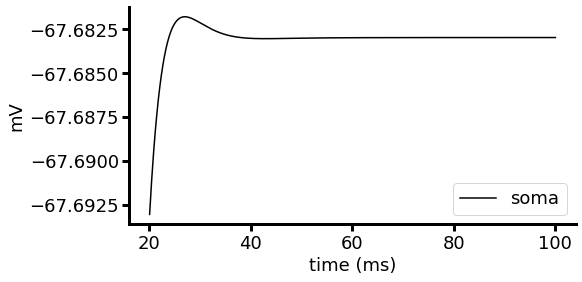

Somatic depolarization is 0.01 mV


In [5]:
#========== Synaptic stimulation.
# Place the synapse to the middle (0.5) of the soma, ...
Syn1 = h.ExpSyn(dend1(0.5))
Syn1.e = 0  # Reverse potential of the synapse, mV

# Place the synapse to the middle (0.5) of the soma, ...
Syn2 = h.ExpSyn(dend3(0.5))
Syn2.e = 0  # Reverse potential of the synapse, mV

#========== ...create an artificial spike (an "event" to be delivered to the synapse)...
ns = h.NetStim(0.5)
ns.start = 50  # ms
ns.number = 1

#... and connect the event to the synapse.
nc1 = h.NetCon(ns, Syn1, -10, 2, 0.008*0)
nc2 = h.NetCon(ns, Syn2, -10, 2, 0.008*0)

# Calculate and print in terminal the depolarization at the soma and at the middle part of the distal dendrite (dend[1])
vsoma_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()  # Time stamp vector
vsoma_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

# run the simulation
h.run()

# remove the first 200 points
vsoma_vec.remove(0, 200)
t_vec.remove(0, 200)

plt.figure(figsize=(8, 4))
soma_plot = plt.plot(t_vec, vsoma_vec, color='black')
plt.legend(soma_plot, ['soma'])
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.show()

print(f'Somatic depolarization is {round(vsoma_vec.max() - vsoma_vec.min(), 2)} mV')